In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
# Ma'lumotlar
np.random.seed(42)
X = np.linspace(-10, 10, 100).reshape(-1, 1)
y_real = 2 * X**2 + 3 * X + 1
noise = np.random.randn(100, 1) * 10
y = y_real + noise

In [12]:
# Sinf belgilash: agar nuqta parabola ostida yoki ustida joylashgan bo‘lsa
# Agar haqiqatda y > parabola qiymati => 1, aks holda 0
y_class = (y > y_real).astype(int).ravel()

In [13]:
# Polynomial xususiyatlar
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [14]:
# Train-Test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_class, test_size=0.2, random_state=42)

In [15]:
# Klassifikatsiya modeli
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
# Bashorat
y_pred = model.predict(X_test)

In [17]:
# Natijalar
print("Aniqlik (Accuracy):", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Aniqlik (Accuracy): 0.45
Confusion Matrix:
 [[8 2]
 [9 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.80      0.59        10
           1       0.33      0.10      0.15        10

    accuracy                           0.45        20
   macro avg       0.40      0.45      0.37        20
weighted avg       0.40      0.45      0.37        20



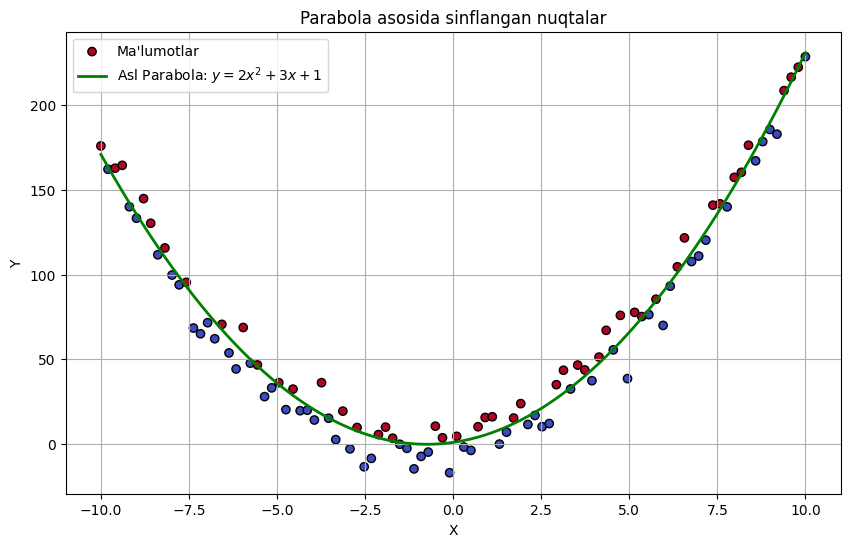

In [18]:
# Vizualizatsiya
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c=y_class, cmap='coolwarm', label='Ma\'lumotlar', edgecolors='k')
plt.plot(X, y_real, color='green', label='Asl Parabola: $y=2x^2+3x+1$', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Parabola asosida sinflangan nuqtalar')
plt.legend()
plt.grid(True)
plt.show()